In [1]:
import sys
sys.path.append("/usr/lib/spark/python")
sys.path.append("/usr/lib/spark/python/lib/py4j-0.10.4-src.zip")
sys.path.append("/usr/lib/python3/dist-packages")

import os
os.environ["HADOOP_CONF_DIR"] = "/etc/hadoop/conf"

import os
os.environ["PYSPARK_PYTHON"] = "python3"
os.environ["PYSPARK_DRIVER_PYTHON"] = "ipython"

from pyspark.mllib.clustering import KMeans, KMeansModel 
from pyspark import SparkConf, SparkContext

from osgeo import gdal
from io import BytesIO

from rasterio.io import MemoryFile

In [2]:
appName = "kmeans_mlib_hdfs"
masterURL="spark://emma0.emma.nlesc.nl:7077"

try:
    sc.stop()
except NameError:
    print("A  new Spark Context will be created.")
    
sc = SparkContext(conf = SparkConf().setAppName(appName).setMaster(masterURL))

A  new Spark Context will be created.


In [23]:
file_path = "hdfs:///user/hadoop/spring-index/BloomFinal/1980.tif"
data = sc.binaryFiles(file_path).take(1)

dataByteArray = bytearray(data[0][1])

#If it is needed to convert to a numpy array
#import numpy as np
#file_bytes = np.asarray(dataByteArray, dtype=np.uint8)

In [24]:
with MemoryFile(dataByteArray) as memfile:
    with memfile.open() as dataset:
        print(dataset.profile)

{'transform': Affine(0.008983152841195215, 0.0, -126.30312894720473,
       0.0, -0.008983152841195215, 49.25462702827337), 'width': 7808, 'height': 3892, 'nodata': None, 'count': 4, 'tiled': False, 'driver': 'GTiff', 'compress': 'lzw', 'dtype': 'float64', 'crs': CRS({'init': 'epsg:4326'}), 'interleave': 'pixel'}


In [49]:
#Visualization inspired in
#https://github.com/mapbox/rasterio/blob/master/examples/Data%20visualization.ipynb
import matplotlib.pyplot as plt
import rasterio
from rasterio import plot

with MemoryFile(dataByteArray) as memfile:
    with memfile.open() as dataset:
        plot.show((dataset,1))

<IPython.core.display.Javascript object>


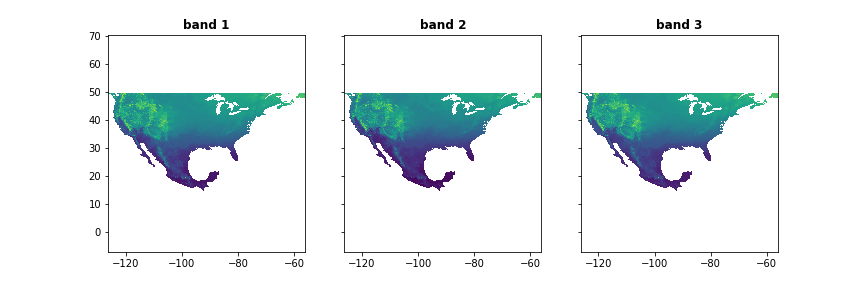

In [50]:
#with MemoryFile(dataByteArray) as memfile:
#    with memfile.open() as dataset:
memfile = MemoryFile(dataByteArray)
dataset = memfile.open()

#You must run on chrome, it does not work on firefox.
#It will create an interactive map.
%matplotlib notebook       
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(12, 4), sharex=True, sharey=True)
plot.show((dataset, 1), title='band 1', ax=axr)
plot.show((dataset, 2), title='band 2', ax=axg)
plot.show((dataset, 3), title='band 3', ax=axb)

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


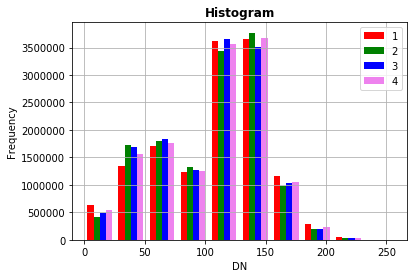

In [42]:
%matplotlib inline
plot.show_hist(dataset)